## Plotting earthquake data

In [4]:
import os
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

## About the data
- USGS Earthquakes Database
- Natural Earth's low resolution cultural boundaries data

In [21]:
# Load earthquake dataset through link 
eqk = pd.read_csv('https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv')
eqk.dtypes 
# Load boundary shapefile through local directory
# Check working directory
os.getcwd()
# define filepath 
fp = os.path.join('data','ne_110m_admin_0_countries.shp')
boundary = gpd.read_file(fp)
boundary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
print('boundary is projected?', boundary.crs.is_projected)

boundary is projected? False


## Brainstorm steps
- create points from csv 
- create geodataframe from points 
- data selection mag >6.4
- plot map with legend 




In [34]:
# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)
eqk.head()

# Create points from latitude and longitude
points = gpd.points_from_xy(eqk.longitude,
                           eqk.latitude)

# Create geodataframe
eqk = gpd.GeoDataFrame(eqk, # Data source
                      geometry=points, # Specify geometry column
                      crs='EPSG:4326' # Specify CRS
                      )

# Check geometry column
eqk.geometry

14025        POINT (82.58640 35.90530)
22968      POINT (-70.70220 -19.98070)
24887      POINT (-125.13380 40.82870)
31496       POINT (155.02410 -6.75470)
31670       POINT (155.08690 -6.65580)
31850      POINT (-100.97230 17.39700)
32964        POINT (8.72200 -53.49670)
33523      POINT (162.05200 -11.12840)
33537      POINT (162.05110 -11.46330)
33808      POINT (162.14810 -11.27010)
34096       POINT (-85.87790 11.64200)
34318       POINT (155.04850 -6.58580)
36918      POINT (-70.49310 -20.57090)
37367      POINT (-70.94550 -19.89270)
37371      POINT (-70.76910 -19.60970)
39915        POINT (25.38890 40.28930)
46333      POINT (179.08560 -24.61080)
47320      POINT (170.35460 -21.45420)
47776     POINT (-175.50960 -14.98310)
47934      POINT (-28.36690 -55.47030)
50562       POINT (178.73520 51.84860)
50587     POINT (-177.60730 -29.94140)
50609     POINT (-177.72470 -29.97720)
61294     POINT (-178.40010 -19.80150)
66278       POINT (-92.46140 14.72400)
71135      POINT (-73.571

<AxesSubplot:>

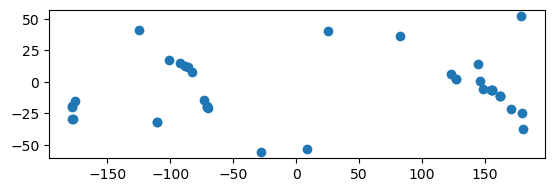

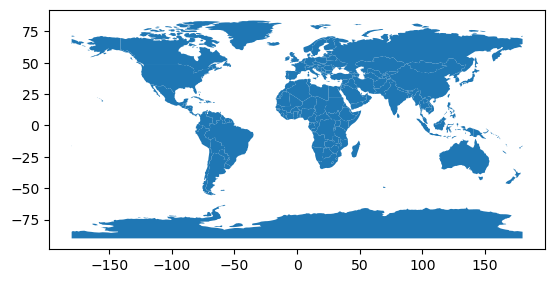

In [35]:
# Preview GeoDataFrame
eqk.plot()
boundary.plot()

<AxesSubplot:title={'center':'Earthquake of magnitutde at least 6.5 in 2014'}>

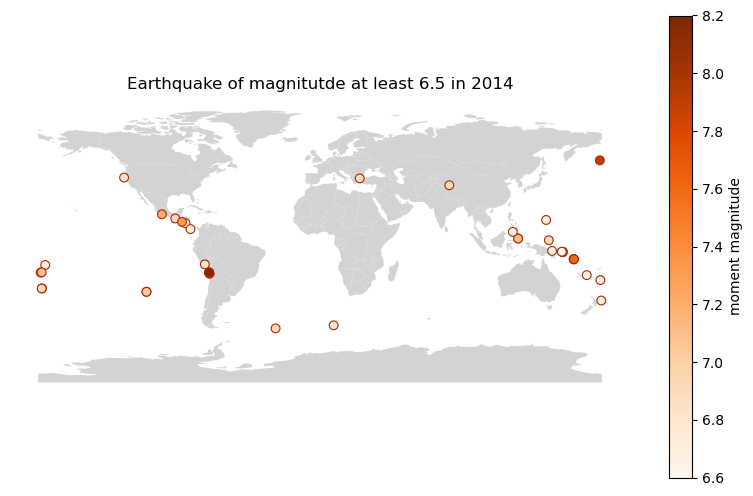

In [41]:
 # Select eqk with mag>6
# eqk = eqk[eqk['mag']>=6.5]

# plot
fix, ax = plt.subplots(figsize = (10, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Earthquake of magnitutde at least 6.5 in 2014')

# Plot basemap
boundary.plot(ax=ax,
             color='lightgrey'
             )

# Add eqk color by magnitude
eqk.plot(ax=ax,
         column='mag',
         legend=True,
         markersize=40,
         edgecolors='#AA2704',
         cmap='Oranges',
         linewidth=0.8,
         legend_kwds={
             'label':'moment magnitude'
         })
